# Tarea Parcial Evaluable Número 1: Principios de Imágen

In [155]:
#Importar las librerías por utilizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage
from skimage import io
from skimage.filters import threshold_otsu,sobel,sobel_v,sobel_h

#Obtener la direccion de las imagenes
path = os.getcwd()

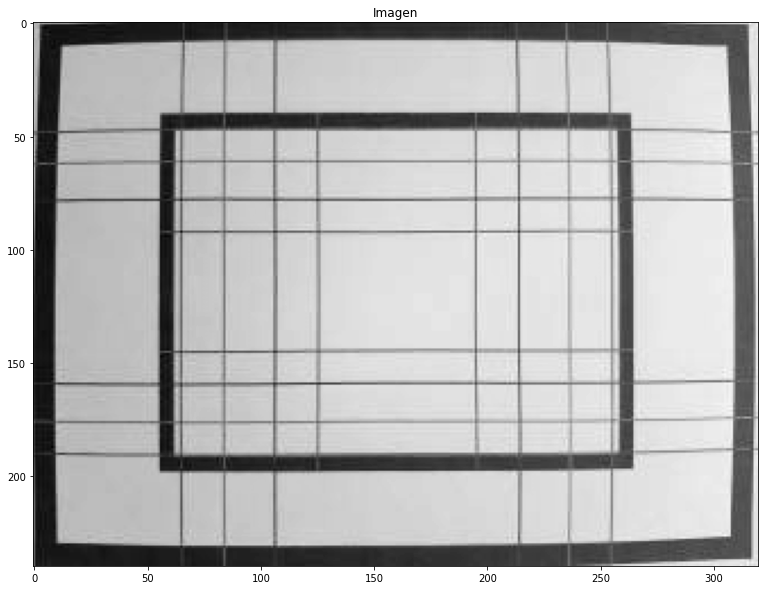

In [156]:
imagen= io.imread(path +r'\Prueba_1.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(imagen,cmap='gray')
plt.title("Imagen")
plt.show()

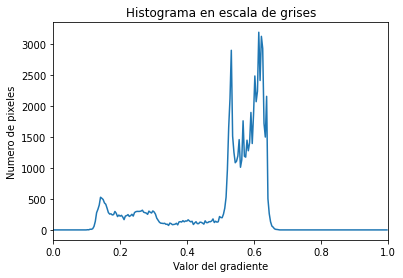

In [157]:
histogram, bin_edges = np.histogram(imagen, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

0.4072613250612745


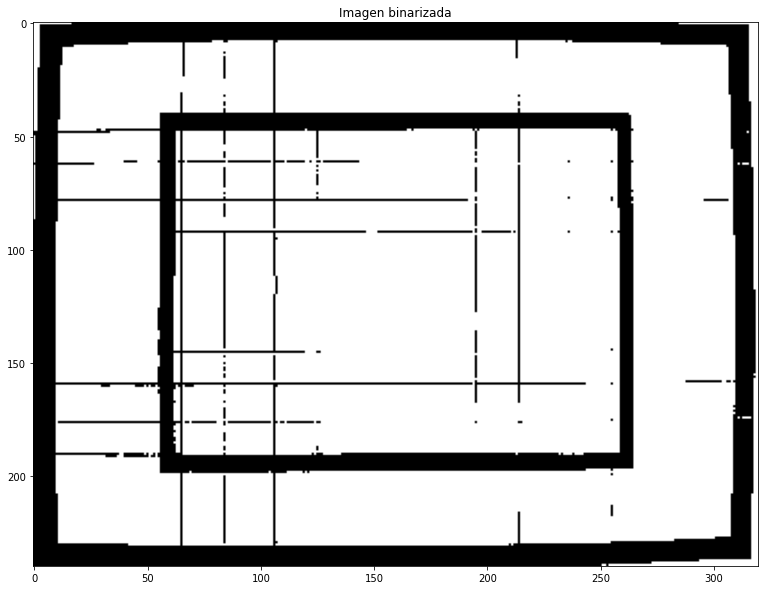

In [158]:
thresh = threshold_otsu(imagen)
print (thresh)
binary = imagen > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary, cmap='gray')
plt.show()

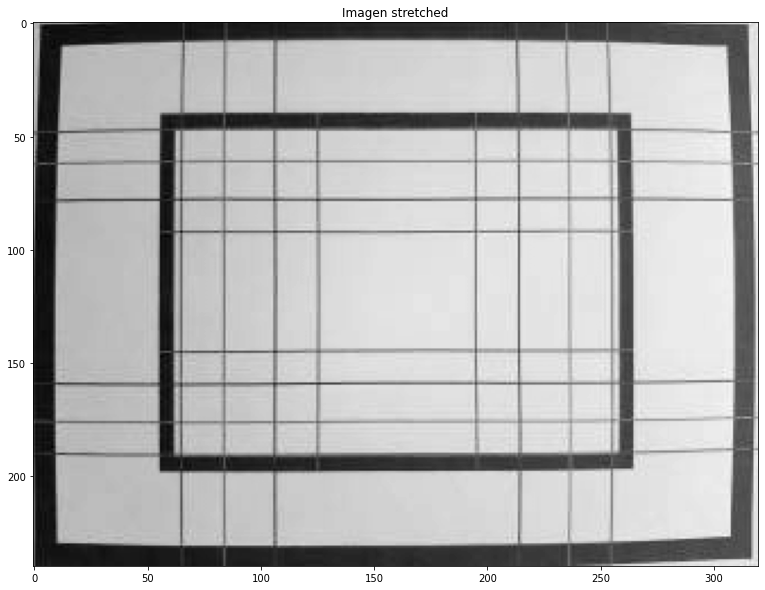

In [159]:
streched = skimage.exposure.rescale_intensity(imagen, in_range=(0.1,0.7), out_range=(0, 1))
plt.figure(figsize=(15,10))
plt.title("Imagen stretched")
plt.imshow(streched, cmap='gray')
plt.show()

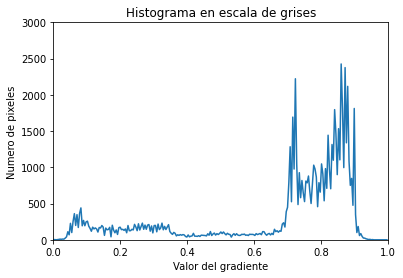

In [160]:
histogram, bin_edges = np.histogram(streched, bins=256, range=(0, 1))
plt.title("Histograma en escala de grises")
plt.xlabel("Valor del gradiente")
plt.ylabel("Numero de pixeles")
plt.ylim([0.0, 3000])
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)
plt.show()

0.5138141748366014


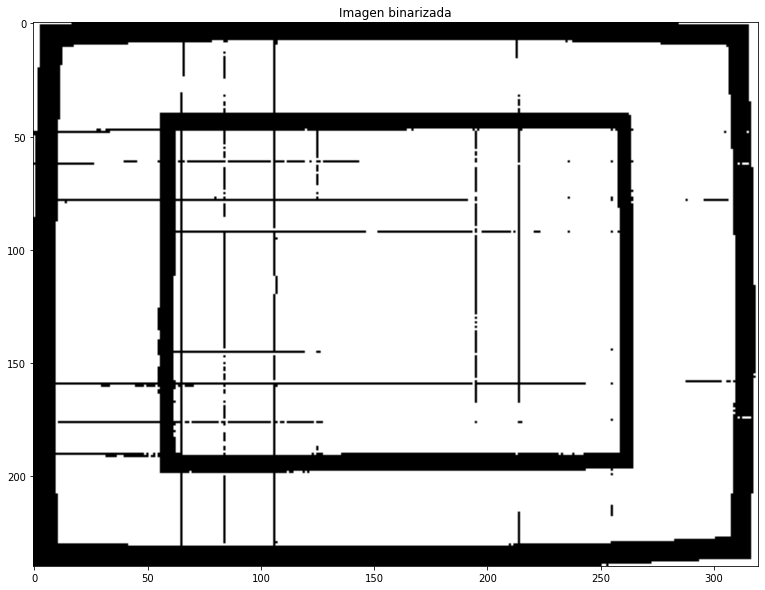

In [161]:
thresh = threshold_otsu(streched)
print (thresh)
binary_str = streched > thresh
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(binary_str, cmap='gray')
plt.show()

Idea: ir recorriendo cada columna de izq a derecha hasta encontrar un pixel de negro y luego ir sobre la misma fila de atras para adelante buscando el primer pixel negro, que representa el ultimo pixel negro, y calcular la distancia horizontal entre ellos, es decir el ancho

In [162]:
def dist_pxl(image):
    v,h = image.shape
    c1 = 0
    c2 = 0
    found = False
    for col in range(h):
        for row in range(v):
            if found == False and image[row][col] == True:
                c1 = col
                found = True
                break
        if found == True:
            break
    found = False
    for col in range(1,h):
        for row in range(0,v):
            if found == False and image[row][-col] == True:
                c2 = h-col
                found = True
                break
        if found == True:
            break
    if found == True:
        return c2-c1+1
    else:
        return 0
    
                

In [163]:
m =np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]])
dist_pxl(binary)

320

In [164]:
def size_obj(image,work_dist):
    sensor_size_h = 4.2
    focal_dist = 3.31
    pxl_dist = dist_pxl(image)
    sens_res_h = sensor_size_h/320
    dist_sens = pxl_dist*sens_res_h
    width = work_dist*dist_sens/focal_dist
    return round(width,1)

Corregir algunos valores para que los valores sean de ancho

In [165]:
size_obj(binary_str,108)

137.0

In [166]:
def binarize(image,thresh=0):
    if thresh==0:
        thresh = threshold_otsu(image)
    binary = image > thresh
    return binary

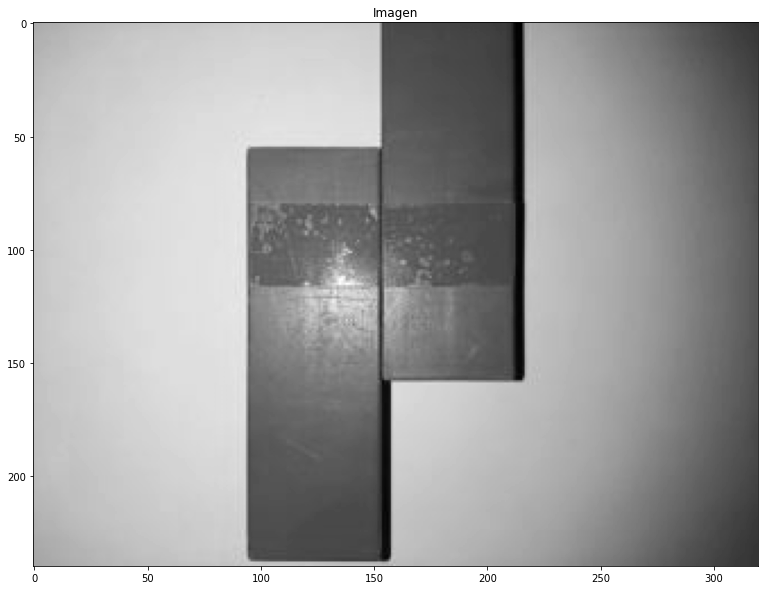

In [167]:
IMG_VER= io.imread(path +r'\IMG_VERDE.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(IMG_VER,cmap='gray')
plt.title("Imagen")
plt.show()

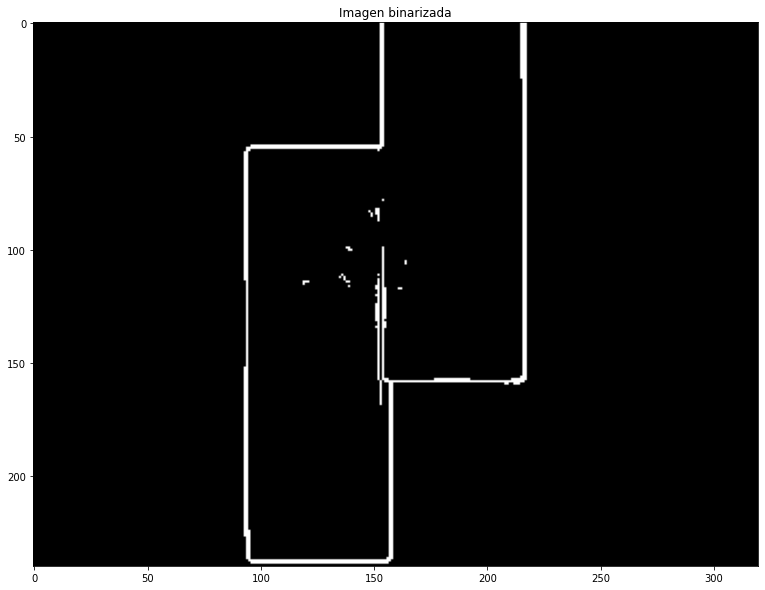

In [182]:
VER_bin_sob = binarize(sobel(IMG_VER))
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(VER_bin_sob, cmap='gray')
plt.show()

In [183]:
size_VER = size_obj(VER_bin_sob,118)
print(size_VER)

58.5


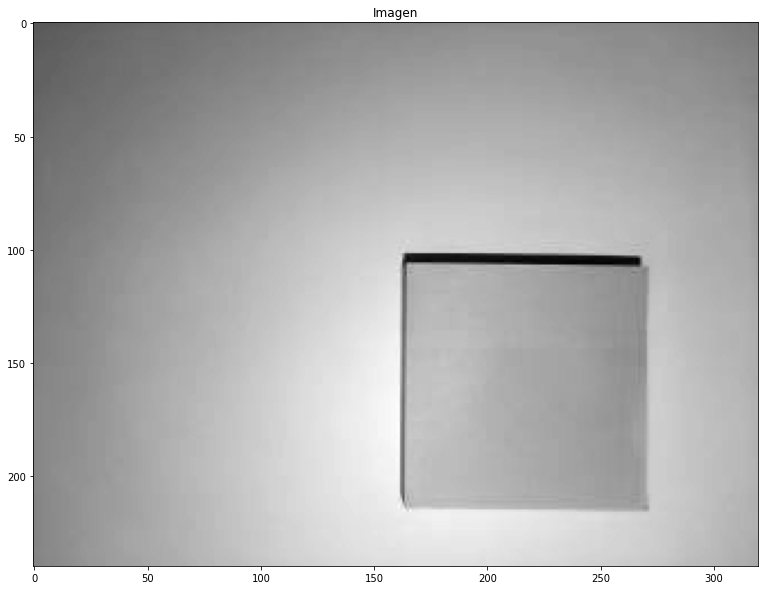

In [170]:
IMG_ROSA= io.imread(path +r'\IMG_ROSA.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(IMG_ROSA,cmap='gray')
plt.title("Imagen")
plt.show()

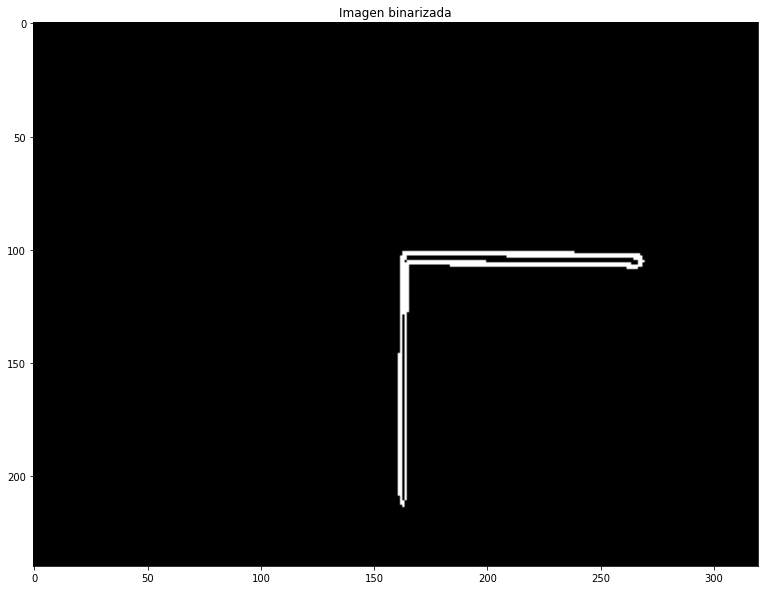

In [188]:
ROSA_bin_sob = binarize(sobel(IMG_ROSA))
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(ROSA_bin_sob, cmap='gray')
plt.show()

In [189]:
size_ROSA = size_obj(ROSA_bin_sob,119)
print(size_ROSA)

51.4


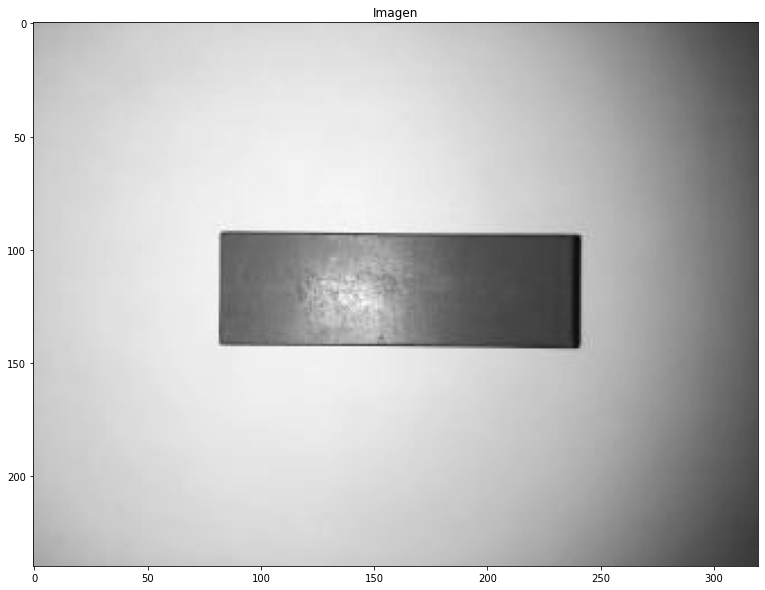

In [173]:
IMG_AZ= io.imread(path +r'\IMG_AZUL.jpeg',True)

plt.figure(figsize=(15,10))
plt.imshow(IMG_AZ,cmap='gray')
plt.title("Imagen")
plt.show()

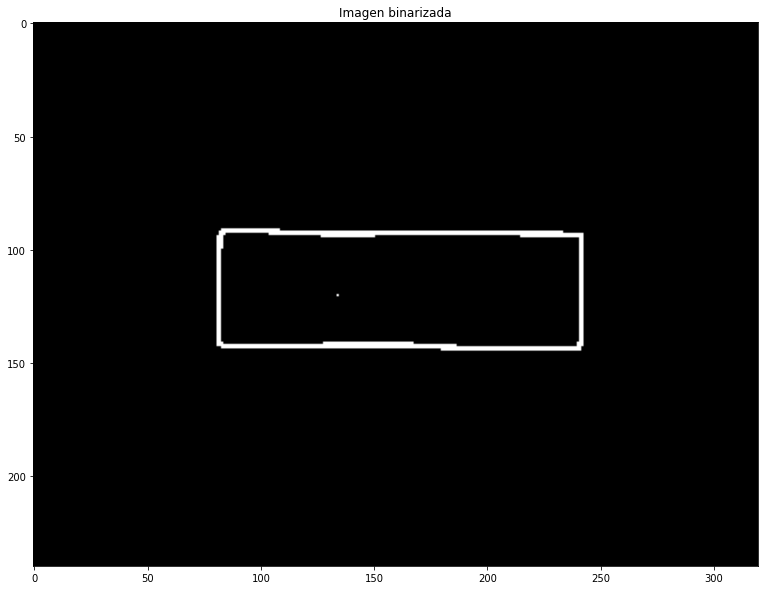

In [186]:
AZ_bin_sob = binarize(sobel(IMG_AZ))
plt.figure(figsize=(15,10))
plt.title("Imagen binarizada")
plt.imshow(AZ_bin_sob, cmap='gray')
plt.show()

In [187]:
size_AZ = size_obj(AZ_bin_sob,139)
print(size_AZ)

89.3
